In [1]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, validation_curve, learning_curve
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Print many statements at the same time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
# Import dataset and create dataframe
from sklearn import datasets
boston = datasets.load_boston()

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston.keys()
boston.data.shape
boston.feature_names
boston.target

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

(506, 13)

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
# Create dataframe
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
X = boston_df.copy()
y = boston.target

In [8]:
# Create train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(354, 13)

(152, 13)

(354,)

(152,)

In [9]:
# Define models
lm_pipe = Pipeline([('scaler', StandardScaler()), ('lm', LinearRegression())])
lm_lasso_pipe = Pipeline([('scaler', StandardScaler()), ('lm_lasso', Lasso())])
lm_ridge_pipe = Pipeline([('scaler', StandardScaler()), ('lm_ridge', Ridge())])
lm_elastic_pipe = Pipeline([('scaler', StandardScaler()), ('lm_elastic', ElasticNet())])

In [10]:
# Fit models
lm_pipe.fit(X_train, y_train)
lm_lasso_pipe.fit(X_train, y_train)
lm_ridge_pipe.fit(X_train, y_train)
lm_elastic_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

Pipeline(steps=[('scaler', StandardScaler()), ('lm_lasso', Lasso())])

Pipeline(steps=[('scaler', StandardScaler()), ('lm_ridge', Ridge())])

Pipeline(steps=[('scaler', StandardScaler()), ('lm_elastic', ElasticNet())])

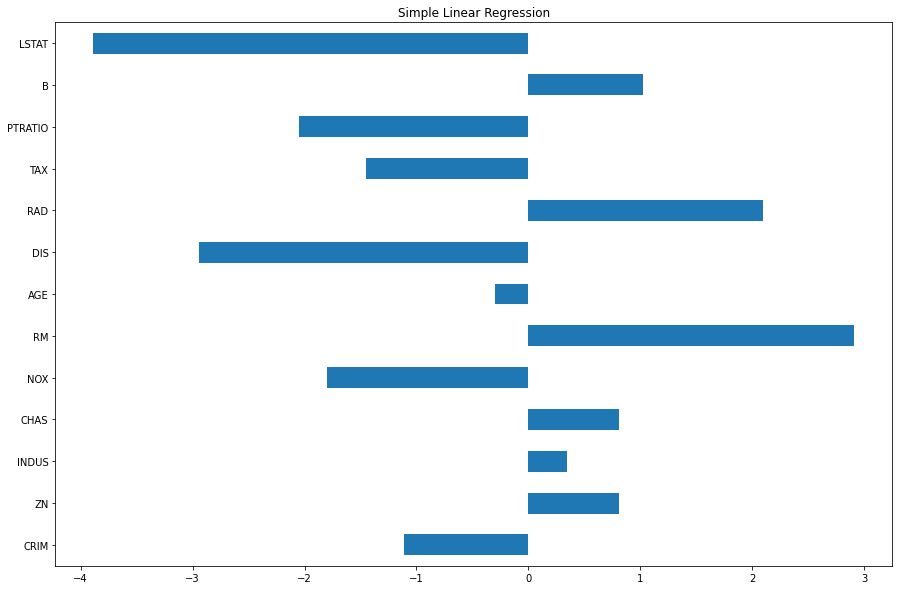

In [11]:
# Evaluate the linear model
plt.figure(figsize=(15, 10))
ft_importances_lm = pd.Series(lm_pipe['lm'].coef_, index=X.columns)
ft_importances_lm.plot(kind='barh', title='Simple Linear Regression')
plt.show();

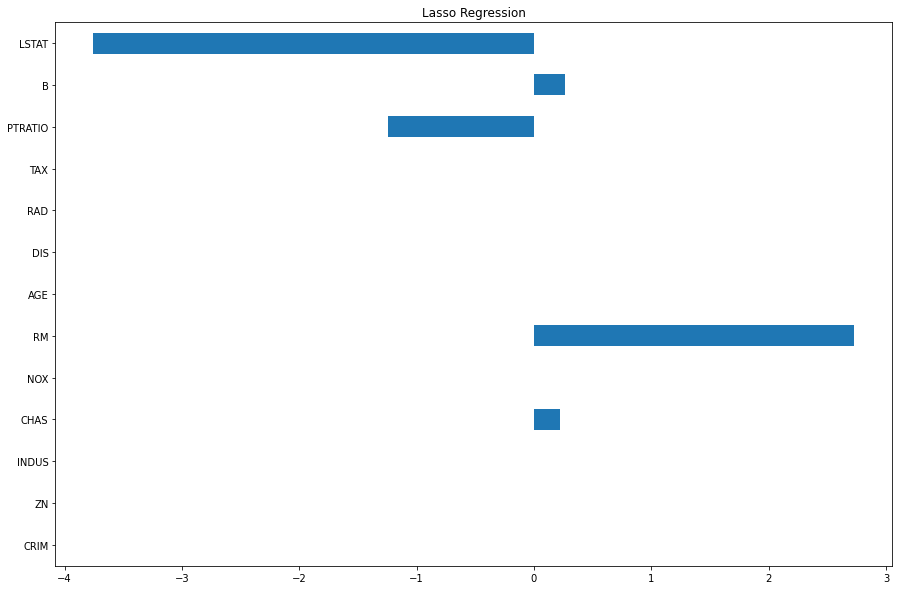

In [12]:
# Evaluate the model with Lasso
plt.figure(figsize=(15, 10))
ft_importances_lm_lasso = pd.Series(lm_lasso_pipe['lm_lasso'].coef_, index=X.columns)
ft_importances_lm_lasso.plot(kind='barh', title='Lasso Regression')
plt.show();

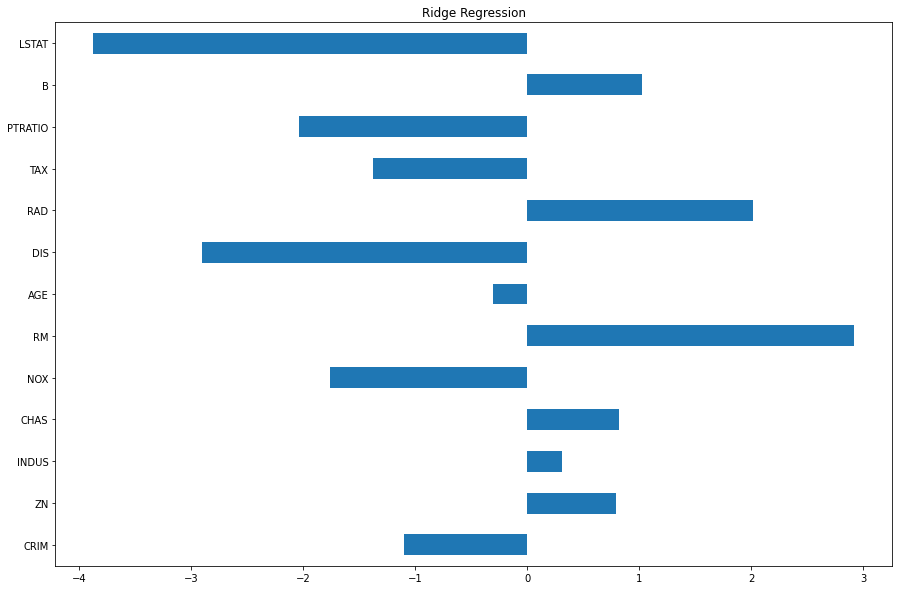

In [13]:
# Evaluate the model with Ridge regularization
plt.figure(figsize=(15, 10))
ft_importances_lm_ridge = pd.Series(lm_ridge_pipe['lm_ridge'].coef_, index=X.columns)
ft_importances_lm_ridge.plot(kind='barh', title='Ridge Regression')
plt.show();

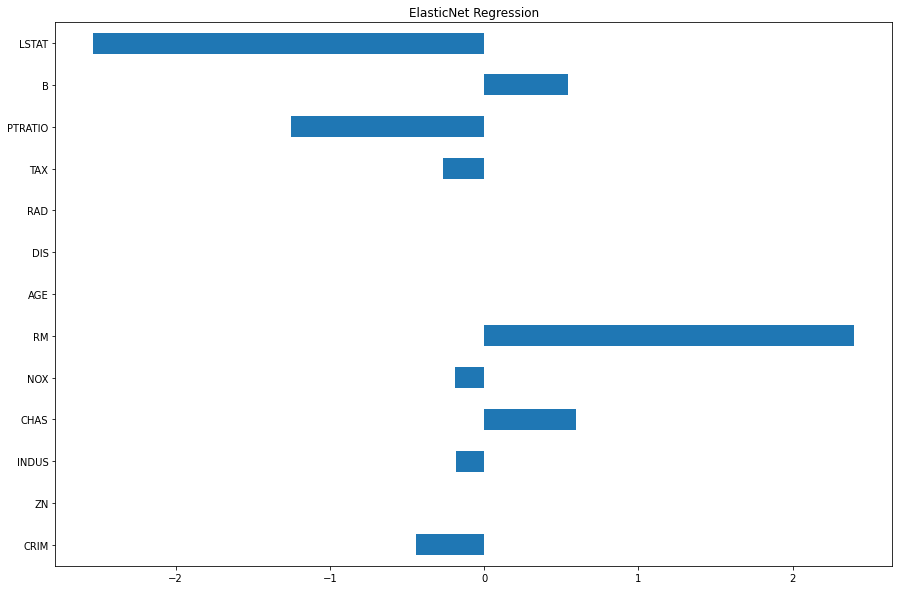

In [14]:
# Evaluate the model with ElasticNet regularization
plt.figure(figsize=(15, 10))
ft_importances_lm_elastic = pd.Series(lm_elastic_pipe['lm_elastic'].coef_, index=X.columns)
ft_importances_lm_elastic.plot(kind='barh', title='ElasticNet Regression')
plt.show();

In [15]:
# Look at R2 values
print("R2 for Simple Linear Regression is %.3f" % (lm_pipe.score(X_test, y_test)))
print("R2 for Lasso Regression is %.3f" % (lm_lasso_pipe.score(X_test, y_test)))
print("R2 for Ridge Regression is %.3f" % (lm_ridge_pipe.score(X_test, y_test)))
print("R2 for ElasticNet Regression is %.3f" % (lm_elastic_pipe.score(X_test, y_test)))

R2 for Simple Linear Regression is 0.711
R2 for Lasso Regression is 0.644
R2 for Ridge Regression is 0.711
R2 for ElasticNet Regression is 0.631


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=lm_elastic__alpha, param_range=[1.00000000e-07 2.33572147e-07 5.45559478e-07 1.27427499e-06
 2.97635144e-06 6.95192796e-06 1.62377674e-05 3.79269019e-05
 8.85866790e-05 2.06913808e-04 4.83293024e-04 1.12883789e-03
 2.63665090e-03 6.15848211e-03 1.43844989e-02 3.35981829e-02
 7.84759970e-02 1.83298071e-01 4.28133240e-01 1.00000000e+00] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


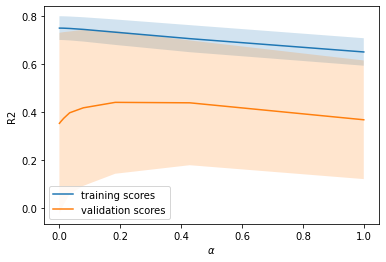

In [16]:
# Validation curve

alphas = np.logspace(-7, 0, 20)
val_train, val_test = validation_curve(lm_elastic_pipe, X, y, 'lm_elastic__alpha', alphas, cv=5, scoring='r2')

def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
    facecolor=lines[0].get_color(), alpha=0.2)

plot_with_err(alphas, val_train, label='training scores')
plot_with_err(alphas, val_test, label='validation scores')
plt.xlabel(r'$\alpha$') 
plt.ylabel('R2')
plt.legend();

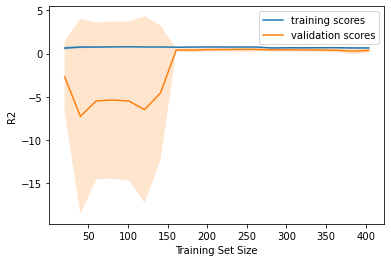

In [17]:
def plot_learning_curve(pipe):
    train_sizes = np.linspace(0.05, 1, 20)
    N_train, val_train, val_test = learning_curve(pipe, X, y, train_sizes=train_sizes, cv=5, scoring='r2')
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size')
    plt.ylabel('R2')
    plt.legend()

plot_learning_curve(lm_elastic_pipe)